In [3]:
# 使用するライブラリのインポート

import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from tqdm import tqdm
import folium # 地図描画ライブラリ

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

%matplotlib inline

In [4]:
TRAINING_PATH = '../data/npy/train/'
VAL_PATH = '../data/npy/validate/'
TEST_PATH = '../data/npy/test/'

TRAINING_PATH_5SEC = 'E:/SHL2023/data/every_5s/train/'
VAL_PATH_5SEC = 'E:/SHL2023/data/every_5s/validate/'
TEST_PATH_5SEC = 'E:/SHL2023/data/every_5s/test/'
hoji = 'Hand'

In [5]:
# TRAINING
# ラベルの読み込み
# epoch label
# Label: Still=1, Walking=2, Run=3, Bike=4, Car=5, Bus=6, Train=7, Subway=8
training_label = np.load(TRAINING_PATH_5SEC + '/Label_every_5s.npy')
print(training_label.shape)

# Acc data
# epoch x y z
training_acc = np.load(TRAINING_PATH_5SEC + hoji + '/Acc_every_5s.npy')
print(training_acc.shape)

# Gyr data
# epoch x y z
training_gyr = np.load(TRAINING_PATH_5SEC + hoji + '/Gyr_every_5s.npy')
print(training_gyr.shape)

# Mag data
# epoch x y z
training_mag = np.load(TRAINING_PATH_5SEC + hoji + '/Mag_every_5s.npy')
print(training_mag.shape)

(195651, 500, 2)
(195651, 500, 4)
(195651, 500, 4)
(195651, 500, 4)


In [6]:
# val
# ラベルの読み込み
# epoch label
# Label: Still=1, Walking=2, Run=3, Bike=4, Car=5, Bus=6, Train=7, Subway=8
val_label = np.load(VAL_PATH_5SEC + '/Label_every_5s.npy')
print(val_label.shape)

# Acc data
# epoch x y z
val_acc = np.load(VAL_PATH_5SEC + hoji + '/Acc_every_5s.npy')
print(val_acc.shape)

# Gyr data
# epoch x y z
val_gyr = np.load(VAL_PATH_5SEC + hoji + '/Gyr_every_5s.npy')
print(val_gyr.shape)

# Mag data
# epoch x y z
val_mag = np.load(VAL_PATH_5SEC + hoji + '/Mag_every_5s.npy')
print(val_mag.shape)

(28730, 500, 2)
(28730, 500, 4)
(28730, 500, 4)
(28730, 500, 4)


In [50]:
# test
# Acc data
# epoch x y z
test_acc = np.load(TEST_PATH_5SEC + '/Acc_every_5s.npy')
print(test_acc.shape)

# Gyr data
# epoch x y z
test_gyr = np.load(TEST_PATH_5SEC +  '/Gyr_every_5s.npy')
print(test_gyr.shape)

# Mag data
# epoch x y z
test_mag = np.load(TEST_PATH_5SEC +  '/Mag_every_5s.npy')
print(test_mag.shape)

(92939, 500, 4)
(92939, 500, 4)
(92939, 500, 4)


In [52]:
training_feature = pd.read_csv('E:/SHL2023/data/feature/train_features.csv')
val_feature = pd.read_csv('E:/SHL2023/data/feature/validate_features.csv')
test_feature = pd.read_csv('E:/SHL2023/data/feature/test_features.csv')

training_feature = training_feature.drop('Unnamed: 0', axis=1)
val_feature = val_feature.drop('Unnamed: 0', axis=1)
test_feature = test_feature.drop('Unnamed: 0', axis=1)

In [78]:
training_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/train/Hand/location_feature_every_5s.csv')
val_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/validate/Hand/location_feature_every_5s.csv')
test_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/test/location_feature_every_5s.csv')
training_location_feature = training_location_feature.drop('Unnamed: 0', axis=1)
val_location_feature = val_location_feature.drop('Unnamed: 0', axis=1)
test_location_feature = test_location_feature.drop('Unnamed: 0', axis=1)

In [27]:
SEKAI = 'E:/SHL2023/data/every_5s/train/Hand/GloL'

Gloacc = np.load(SEKAI + 'Acc' + '_ver2_every_5s.npy')

In [54]:
training_location_feature.shape , val_location_feature.shape

((195651, 17), (28730, 17))

In [89]:
training_feature.shape, val_feature.shape

((195655, 470), (28732, 470))

In [9]:
id = ['id']

train_y = pd.DataFrame(training_label[:, 0, 1], columns=id) - 1
test_y = pd.DataFrame(val_label[:, 0, 1], columns=id) - 1

In [55]:
train_X.shape

(195651, 462)

In [83]:
# training_feature = pd.read_csv('E:/SHL2023/data/feature/train_features.csv')
# val_feature = pd.read_csv('E:/SHL2023/data/feature/validate_features.csv')
# test_feature = pd.read_csv('E:/SHL2023/data/feature/test_features.csv')

# training_feature = training_feature.drop('Unnamed: 0', axis=1)
# val_feature = val_feature.drop('Unnamed: 0', axis=1)
# test_feature = test_feature.drop('Unnamed: 0', axis=1)

# training_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/train/Hand/location_feature_every_5s.csv')
# val_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/validate/Hand/location_feature_every_5s.csv')
# test_location_feature = pd.read_csv('E:/SHL2023/data/every_5s/test/location_feature_every_5s.csv')

# training_location_feature = training_location_feature.drop('Unnamed: 0', axis=1)
# val_location_feature = val_location_feature.drop('Unnamed: 0', axis=1)
# test_location_feature = test_location_feature.drop('Unnamed: 0', axis=1)

# training_feature = standardize_columns(training_feature)
# val_feature = standardize_columns(val_feature)
# test_feature = standardize_columns(test_feature)

# training_feature = pd.concat((training_feature, training_location_feature), axis=1)
# val_feature = pd.concat((val_feature, val_location_feature), axis=1)
# test_feature = pd.concat((test_feature, test_location_feature), axis=1)

# tr_for_save = training_feature[left_values]
# vl_for_save = val_feature[left_values]
# ts_for_save = test_feature[left_values]

# tr_for_save.to_csv('E:/SHL2023/data/training_great_feature.csv', index=True)
# vl_for_save.to_csv('E:/SHL2023/data/validate_great_feature.csv', index=True)
# ts_for_save.to_csv('E:/SHL2023/data/test_great_feature.csv', index=True)

標準化してみる

In [10]:
def standardize_columns(df):
    # 列ごとの平均と標準偏差を計算
    means = df.mean()
    stds = df.std()

    # 列ごとに標準化を適用
    standardized_df = (df - means) / stds

    return standardized_df

In [82]:
training_feature = standardize_columns(training_feature)
val_feature = standardize_columns(val_feature)
test_feature = standardize_columns(test_feature)
id = ['id']

train_y = pd.DataFrame(training_label[:, 0, 1], columns=id) - 1
test_y = pd.DataFrame(val_label[:, 0, 1], columns=id) - 1

合成

In [12]:
train_X = pd.concat((training_feature, training_location_feature), axis=1)
test_X = pd.concat((val_feature, val_location_feature), axis=1)

train_X = train_X.astype('float64')
test_X = test_X.astype('float64')

In [97]:
train_X.shape, training_feature.shape, training_location_feature.shape, test_X.shape, val_feature.shape, val_location_feature.shape

((195651, 479),
 (195651, 462),
 (195651, 17),
 (28730, 479),
 (28730, 462),
 (28730, 17))

XGBoost Parameters — xgboost 1.1.0-SNAPSHOT documentation

https://xgboost.readthedocs.io/en/latest/parameter.html

In [39]:
training_feature = pd.read_csv('E:/SHL2023/data/training_great_feature.csv')
val_feature = pd.read_csv('E:/SHL2023/data/validate_great_feature.csv')

# training_feature = pd.read_csv('E:/SHL2023/data/train_good_features.csv')
# val_feature = pd.read_csv('E:/SHL2023/data/validate_good_features.csv')

training_feature = training_feature.drop('Unnamed: 0', axis=1)
val_feature = val_feature.drop('Unnamed: 0', axis=1)


# training_feature = pd.concat((training_feature, training_location_feature), axis=1)
# val_feature = pd.concat((val_feature, val_location_feature), axis=1)

id = ['id']

train_X = pd.DataFrame(training_feature)
test_X =  pd.DataFrame(val_feature)


train_y = pd.DataFrame(training_label[:, 0, 1], columns=id) - 1
test_y = pd.DataFrame(val_label[:, 0, 1], columns=id) - 1

train_X = train_X.astype('float64')
test_X = test_X.astype('float64')

In [67]:
train_X.shape, test_X.shape

((195651,), (28730,))

In [1]:
%%time
max_depth_search = []
evals_result = {}

model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005,
                                subsample=0.8, colsample_bytree=0.8, n_estimators=500,
                                n_jobs=-1, tree_method='gpu_hist', gpu_id=0)

                # 'eval_metric': 'merror',  # early_stopping_roundsの評価指標
                
model.fit(train_X, train_y, early_stopping_rounds=30, eval_set=[(train_X, train_y), (test_X, test_y)],
            eval_metric='merror', verbose=False)

NameError: name 'xgb' is not defined

In [46]:
pred = model.predict(train_X)
f1_macro = f1_score(train_y, pred, average='macro')
print(f1_macro)
pred = model.predict(test_X)
f1_macro = f1_score(test_y, pred, average='macro')
print(f1_macro)

1.0
0.8500379446995203


追加してくやつ Forward Selection
## 特徴量を選択するやつはこれです

In [115]:
%%time

import warnings

training_feature = pd.read_csv('E:/SHL2023/data/feature/train_features.csv')
val_feature = pd.read_csv('E:/SHL2023/data/feature/validate_features.csv')

# training_feature = pd.read_csv('E:/SHL2023/data/train_good_features.csv')
# val_feature = pd.read_csv('E:/SHL2023/data/validate_good_features.csv')

training_feature = training_feature.drop('Unnamed: 0', axis=1)
val_feature = val_feature.drop('Unnamed: 0', axis=1)

training_feature = standardize_columns(training_feature)
val_feature = standardize_columns(val_feature)

training_feature = pd.concat((training_feature, training_location_feature), axis=1)
val_feature = pd.concat((val_feature, val_location_feature), axis=1)

id = ['id']

train_X = pd.DataFrame(training_feature)
test_X =  pd.DataFrame(val_feature)
train_y = pd.DataFrame(training_label[:, 0, 1], columns=id) - 1
test_y = pd.DataFrame(val_label[:, 0, 1], columns=id) - 1

train_X = train_X.astype('float64')
test_X = test_X.astype('float64')

train_X[np.isinf(train_X)] = 9999999999
test_X[np.isinf(test_X)] = 9999999999

feature_name = []
pred_max = []
chk = []
training_good_feature = pd.DataFrame()
test_good_feature = pd.DataFrame()
warnings.simplefilter('ignore')

evals_result = {}
for feat in range(30):
        overfit = []
        pred_test = []
        for i in range(training_feature.shape[1]):
                id = ['id']
                
                train_X = training_good_feature.copy()
                selected_columns = training_feature.columns[i]
                train_X[selected_columns] = training_feature[selected_columns]

                test_X = test_good_feature.copy()
                selected_columns = val_feature.columns[i]
                test_X[selected_columns] = val_feature[selected_columns]

                train_y = pd.DataFrame(training_label[:, 0, 1], columns=id) - 1
                test_y = pd.DataFrame(val_label[:, 0, 1], columns=id) - 1

                model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005,
                                subsample=0.8, colsample_bytree=0.8, n_estimators=500,
                                n_jobs=-1, tree_method='gpu_hist', gpu_id=0)

                # 'eval_metric': 'merror',  # early_stopping_roundsの評価指標
                
                model.fit(train_X, train_y, early_stopping_rounds=30, eval_set=[(train_X, train_y), (test_X, test_y)],
                        eval_metric='merror', verbose=False)

                pred = model.predict(train_X)
                f1_macro = f1_score(train_y, pred, average='macro')
                overfit.append(float(f1_macro))

                pred = model.predict(test_X)
                f1_macro = f1_score(test_y, pred, average='macro')
                pred_test.append(float(f1_macro))

        # predが最大だった列を追加
        selected_columns = training_feature.columns[pred_test.index(max(pred_test))]
        pred_max.append(max(pred_test))
        print(selected_columns, max(pred_test))

        feature_name.append(selected_columns)
        chk.append(str(feat) + ": " + selected_columns)
        
        training_good_feature[selected_columns] = training_feature[selected_columns]
        test_good_feature[selected_columns] = val_feature[selected_columns]

        # predが最大だった列をドロップ
        training_feature = training_feature.drop(selected_columns, axis=1)
        val_feature = val_feature.drop(selected_columns, axis=1)

speed 0.4985336426361352
gyr_size_mean_xyz 0.6617466928935987
distance_railways 0.7119712479627736
mag_std_y 0.7525872419635129
acc_sign_sum_y 0.7824474423281471
acc_fft_fft_amp_max_y 0.7827957549274018
gyr_iqr_z 0.7977749172868347
distance_bus_routes 0.8060583668988294
Accuracy 0.8113126836811406
mag_variation_z 0.8131504822203455
mag_iqr_y 0.8259846970530754
acc_fft_var_z 0.8251443731455516
mag_peak_z 0.8351342253463335
mag_fft_skew_z 0.8455971602857066
gyr_max_y 0.8435555193733097
mag_fft_fft_amp_max_y 0.8436293485950375
gyr_fft_second_max_z 0.8475605128137372
mag_kurtosis_z 0.8372189704790706
mag_fft_ratio_max_z 0.8485055712914716
mag_var_y 0.8486549127271611
mag_fft_ratio_min_y 0.8549040147003931
mag_max_z 0.852685749406763
mag_fft_iqr_y 0.8535499660144497
acc_kurtosis_z 0.8514801798059904
gyr_std_x 0.8546766706910179
acc_fft_max_z 0.8540881496987976
acc_fft_fft_amp_min_z 0.8506493394294148
gyr_square_mean_y 0.8528942061501894
gyr_std_z 0.8586652338623977
mag_fft_amp_min_z 0.86078

<Axes: >

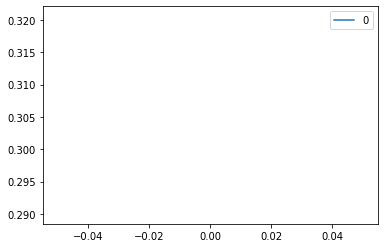

In [76]:
pred_max = pd.DataFrame(pred_max)
pred_max.plot()

In [116]:
training_gogo_feature = pd.DataFrame()
val_gogo_feature = pd.DataFrame()
chk = pd.DataFrame(chk)
pred_max = pd.DataFrame(pred_max)

chk.to_csv('E:/SHL2023/data/chk.csv', index=True)
pred_max.to_csv('E:/SHL2023/data/pred_max.csv', index=True)
train_X.to_csv('E:/SHL2023/data/train_good_features.csv', index=True)
test_X.to_csv('E:/SHL2023/data/validate_good_features.csv', index=True)

AttributeError: 'list' object has no attribute 'to_csv'

In [ ]:
# overfit, pred_tset

In [19]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split

class_names = ['Still', 'Walking', 'Run', 'Bike', 'Car', 'Bus', 'Train', 'Subway']

def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=24, vmin=0, vmax=1, axis=1):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm_rate = cm.astype('float') / cm.sum(axis=axis, keepdims=True)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm_rate, interpolation='nearest', cmap=plt.cm.Blues, vmin=vmin, vmax=vmax)
#     ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    ax.set_ylabel('True label\n', fontsize=fontsize)
    ax.set_xlabel('\nPredicted label', fontsize=fontsize)
    ax.set_xticklabels(class_names, fontsize=fontsize)
    ax.set_yticklabels(class_names, fontsize=fontsize)
    
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm_rate[i, j] * 100, fmt),
                    ha="center",
                    va="center",
                    color="white" if cm_rate[i, j] > 0.5 else 'black', fontsize=fontsize)
            ax.text(j, i+0.3, '( ' + str(cm[i, j]) + ' )', ha="center",
                    va="center",
                    color="white" if cm_rate[i, j] > 0.5 else 'black', fontsize=fontsize//2)
    fig.tight_layout()
    
    print(f1_score(test_y, pred_y, average='macro'))
    print(classification_report(test_y, pred_y))
    return ax

0.9901595135130898
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     24379
         1.0       0.99      0.99      0.99     24451
         2.0       1.00      0.99      0.99      8433
         3.0       1.00      0.99      1.00     23406
         4.0       1.00      0.99      1.00     31691
         5.0       0.99      0.99      0.99     28281
         6.0       0.99      0.98      0.99     31218
         7.0       0.97      0.99      0.98     23792

    accuracy                           0.99    195651
   macro avg       0.99      0.99      0.99    195651
weighted avg       0.99      0.99      0.99    195651



<Axes: xlabel='\nPredicted label', ylabel='True label\n'>

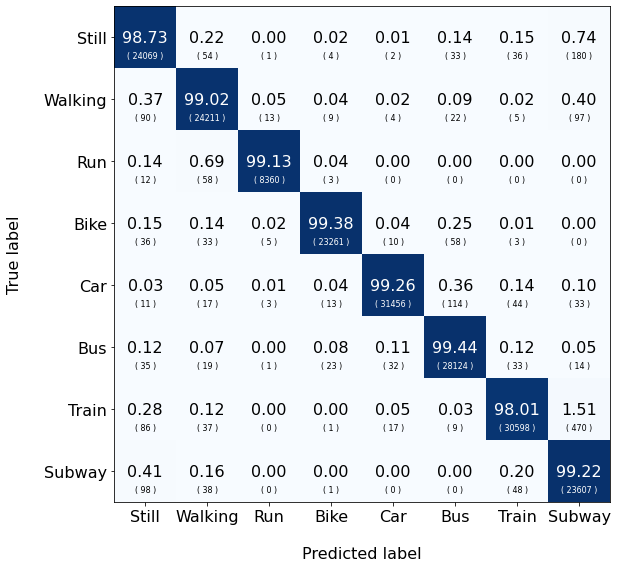

In [42]:
pred = model.predict(train_X)
f1_macro = f1_score(train_y, pred, average='macro')
plot_confusion_matrix(train_y, pred, class_names,True,fontsize=16)

0.860787275311076
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      5955
         1.0       0.92      0.88      0.90      5205
         2.0       0.86      0.96      0.91       552
         3.0       0.91      0.90      0.90      2404
         4.0       0.93      0.76      0.83      4090
         5.0       0.72      0.85      0.78      1831
         6.0       0.85      0.87      0.86      4357
         7.0       0.79      0.93      0.86      4336

    accuracy                           0.86     28730
   macro avg       0.86      0.87      0.86     28730
weighted avg       0.86      0.86      0.86     28730



<Axes: xlabel='\nPredicted label', ylabel='True label\n'>

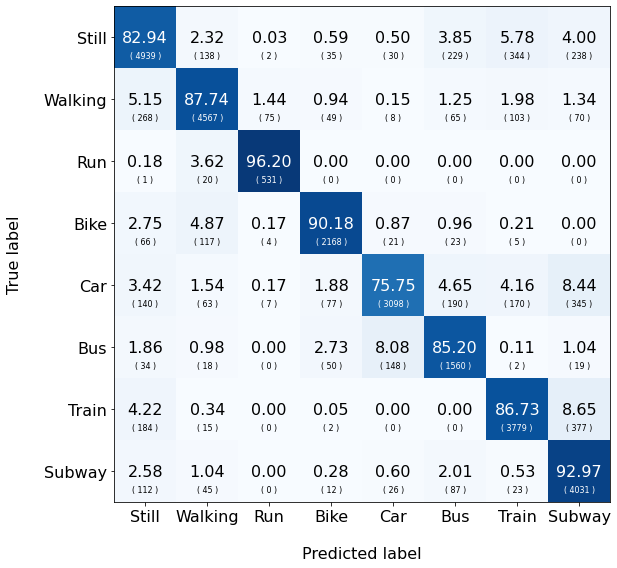

In [43]:
pred = model.predict(test_X)
f1_macro = f1_score(test_y, pred, average='macro')
plot_confusion_matrix(test_y, pred, class_names,True,fontsize=16)

In [387]:
booster = model.get_booster()
importance = booster.get_score(importance_type='gain')

# 重要度をデータフレームに変換
imp_df = pd.DataFrame(importance.items(), columns=['feature', 'importance'])
imp_df = imp_df.sort_values(by='importance', ascending=False)
imp_df

,feature,importance
4,acc_iqr_z,27.637447
5,gyr_iqr_z,26.320183
1,mag_iqr_z,22.179090
2,acc_fft_iqr_y,20.837097
3,acc_fft_abs_sum_y,19.868189
6,gyr_fft_peak_z,14.988652
0,acc_fft_std_x,12.171696


In [206]:
# n = 8
# feature_name = imp_df[:n]
# feature_name = imp_df['feature'][:n]
# training_feature[feature_name].to_csv('E:\SHL2023\data\select_train_' + str(n) + '_features.csv', index=True)
# val_feature[feature_name].to_csv('E:\SHL2023\data\select_validate_' + str(n) + '_features.csv', index=True)

In [1]:
_, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=True)
plt.grid(False)

NameError: name 'plt' is not defined

In [16]:
# 重要度
# gainじゃない方
fimp = model.feature_importances_

# データフレームに変換
imp_df = pd.DataFrame()
imp_df['feature'] = train_X.columns
imp_df['importance'] = fimp.round(decimals=4).astype(str)
imp_df.sort_values(by='importance', ascending=False)

,feature,importance
17,gyr_entropy_y,1e-04
16,gyr_entropy_x,1e-04
437,acc_fft_abs_sum_y,0.0525
157,acc_std_x,0.0478
175,acc_var_x,0.0416
...,...,...
143,gyr_second_ratio_maxmin_y,0.0002
379,gyr_second_ratio_maxmin_x.1,0.0002
345,gyr_fft_ratio_min_z,0.0002
198,gyr_variation_z,0.0002


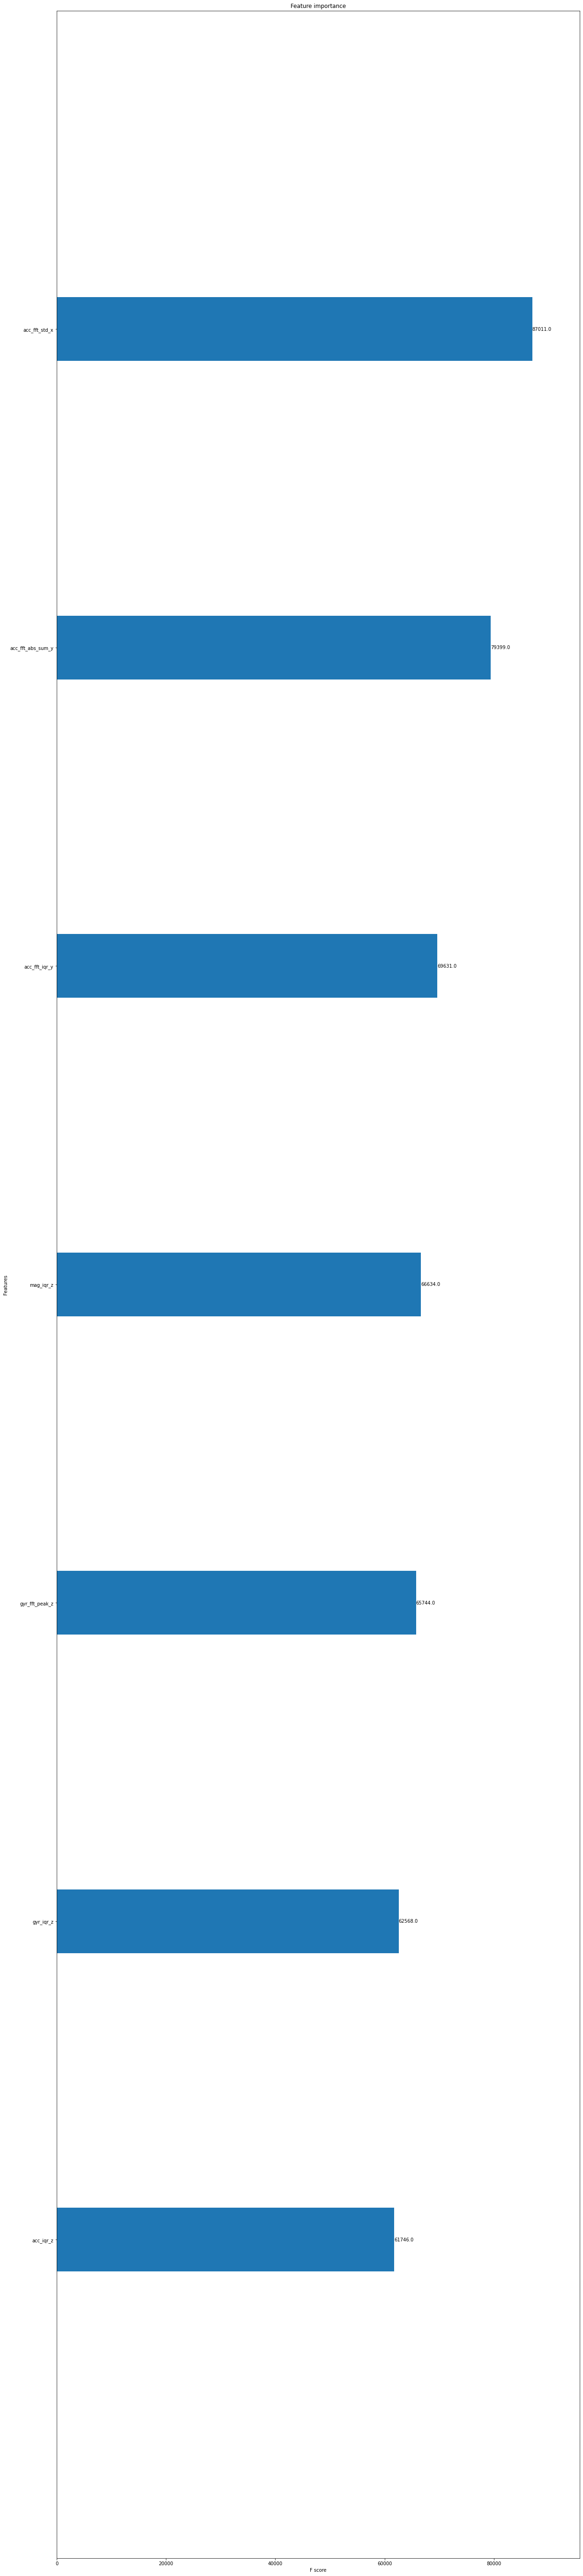

In [401]:
_, ax = plt.subplots(figsize=(20, 100))
xgb.plot_importance(model,
                    ax=ax,
                    show_values=True)
plt.grid(False)